In [4]:
library("httr")
library("jsonlite")
library("ggplot2")

# Politician Activity on Twitter

The parameters in the cell below can be adjusted to explore other politicians and time frames.

### How to explore other politicians?
The ***politician_id*** is an internal identifier that connects the different social media accounts. You can [use this other notebook](../politicians.ipynb?autorun=true) to get other the identifiers of other politicians.

***Alternatively***, you can direcly use the [politicians API](http://mediamonitoring.gesis.org/api/politicians/swagger/), or access it with the [SMM Wrapper](https://pypi.org/project/smm-wrapper/).

## A. Set Up parameters

search for politician ID

In [8]:
install.packages(“curl”)

ERROR: Error in parse(text = x, srcfile = src): <text>:1:18: unerwartete Eingabe
1: install.packages(<e2>
                     ^


In [5]:
search_term <- "beer"

In [6]:
base <- "http://mediamonitoring.gesis.org/api/politicians/"

url_pol_search <- paste(base,"all/search/?names_contain=",search_term, sep="")

In [7]:
fromJSON(content(GET(url_pol_search), "text", encoding="UTF-8"), flatten = TRUE)

ERROR: Error in is.response(x): package ‘curl’ was installed by an R version with different internals; it needs to be reinstalled for use with this R version


In [5]:
# Parameters: 
politician_id = 996
from_date = '2017-09-01'
to_date = '2019-09-31'
aggregation = 'week'

## B. Using the SMM Politician API

In [6]:
#prepare urls
base <- "http://mediamonitoring.gesis.org/api/politicians/"
url_tweets <- paste(base,"twitter/tweets_by/politicians/", politician_id, "/?", sep="")
url_replies <- paste(base,"twitter/replies_to/politicians/", politician_id, "/?", sep="")

#prepare parameters
params = list(
    from_date=from_date,
    to_date=to_date,
    aggregate_by=aggregation
)

# using the api to get the tweets and replies
tweets_by = as.data.frame(fromJSON(content(GET(url_tweets, query=params), "text", encoding="UTF-8"), flatten = TRUE))
replies_to = as.data.frame(fromJSON(content(GET(url_replies, query=params), "text", encoding="UTF-8"), flatten = TRUE))
merged = merge(tweets_by, replies_to, by='labels')

In [7]:
#full_url <- "http://mediamonitoring.gesis.org/api/politicians/twitter/tweets_by/politicians/1928/?from_date=2017-09-01&to_date=2018-12-31&aggregate_by=week"

In [8]:
#replies_to

In [9]:
merged

labels,response_type.x,aggregated_by.x,values.x,response_type.y,aggregated_by.y,values.y
<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<int>
2017-08-28,aggregation,week,50,aggregation,week,56
2017-09-04,aggregation,week,135,aggregation,week,63
2017-09-11,aggregation,week,90,aggregation,week,104
2017-09-18,aggregation,week,96,aggregation,week,85
2017-09-25,aggregation,week,51,aggregation,week,213
2017-10-02,aggregation,week,32,aggregation,week,173
2017-10-09,aggregation,week,72,aggregation,week,109
2017-10-16,aggregation,week,62,aggregation,week,196
2017-10-23,aggregation,week,37,aggregation,week,110


## C. Plotting

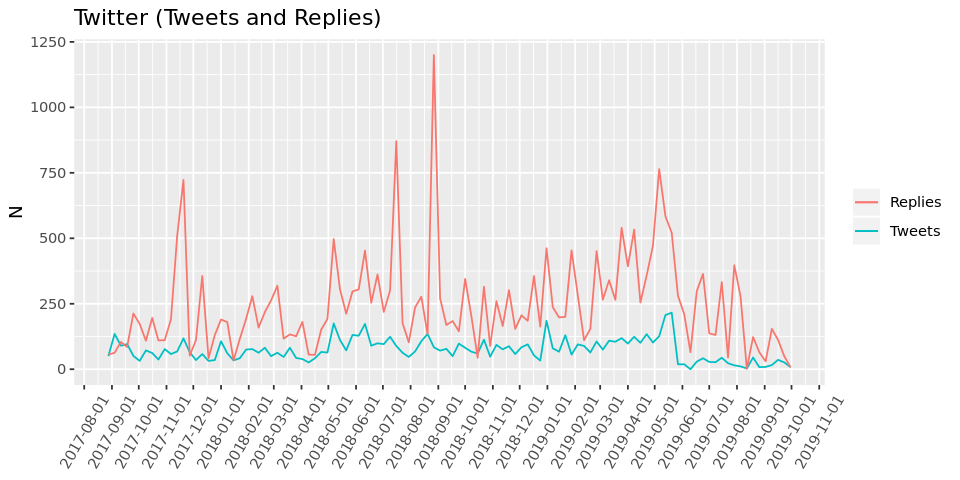

In [10]:

options(repr.plot.width=8, repr.plot.height=4)

# plotting tweets and replies
ggplot(data = merged, mapping = aes(as.Date(labels))) +
  geom_line(aes(y = values.x, color="Tweets")) +
  geom_line(aes(y = values.y, color="Replies")) +
  labs(title = "Twitter (Tweets and Replies)", y = "N") +
  theme(axis.text.x = element_text( angle = 60, hjust = 0.5, vjust = 0.5),
        axis.title.x = element_blank(), legend.title = element_blank()) +
  scale_x_date(date_breaks = "1 month") 

# Vergleich zweier Politikerinnen

In [8]:
params = list(
    from_date='2018-09-01',
    to_date='2019-05-31',
    aggregate_by='month'#,
    #text_contains='Migration'    
)

In [9]:
politician_ids = list('996','1145')#996, 1145

In [19]:
tweets_by <- list()
replies_to <- list()
for (i in seq_along(politician_ids)){
    url_tweets <- paste(base,"twitter/tweets_by/politicians/", politician_ids[i], "/?", sep="")
    url_replies <- paste(base,"twitter/replies_to/politicians/", politician_ids[i], "/?", sep="")
    
    # process tweets by politician 
    tb_temp <- as.data.frame(fromJSON(content(GET(url_tweets, query=params), "text", encoding="UTF-8"), flatten = TRUE))
    tb_temp[['politician_id']] <- as.numeric(politician_ids[i])  
    tweets_by[[i]] <- tb_temp
    
    # process replies to 
    rt_temp  <- as.data.frame(fromJSON(content(GET(url_replies, query=params), "text", encoding="UTF-8"), flatten = TRUE))
    rt_temp[['politician_id']] <- as.numeric(politician_ids[i])  
    replies_to[[i]] <- rt_temp
}

In [20]:
tweets_by

response_type,aggregated_by,labels,values,politician_id
<fct>,<fct>,<fct>,<int>,<dbl>
aggregation,month,2018-09-01,301,996
aggregation,month,2018-10-01,362,996
aggregation,month,2018-11-01,308,996
aggregation,month,2018-12-01,286,996
aggregation,month,2019-01-01,494,996
aggregation,month,2019-02-01,336,996
aggregation,month,2019-03-01,444,996
aggregation,month,2019-04-01,478,996
aggregation,month,2019-05-01,644,996


In [21]:
# Integrate all individual dataframes per politician into single dataframes
tweets_by <- rbind(tweets_by[[1]], tweets_by[[2]])
#tweets_by <- Reduce(function(x, y) rbind(x, y), tweets_by)
replies_to <- rbind(replies_to[[1]], replies_to[[2]])
#replies_to <- Reduce(function(x, y) rbind(x, y), replies_to)


In [22]:
tweets_by

response_type,aggregated_by,labels,values,politician_id
<fct>,<fct>,<fct>,<int>,<dbl>
aggregation,month,2018-09-01,301,996
aggregation,month,2018-10-01,362,996
aggregation,month,2018-11-01,308,996
aggregation,month,2018-12-01,286,996
aggregation,month,2019-01-01,494,996
aggregation,month,2019-02-01,336,996
aggregation,month,2019-03-01,444,996
aggregation,month,2019-04-01,478,996
aggregation,month,2019-05-01,644,996


In [23]:
replies_to

response_type,aggregated_by,labels,values,politician_id
<fct>,<fct>,<fct>,<int>,<dbl>
aggregation,month,2018-09-01,816,996
aggregation,month,2018-10-01,989,996
aggregation,month,2018-11-01,841,996
aggregation,month,2018-12-01,969,996
aggregation,month,2019-01-01,1186,996
aggregation,month,2019-02-01,997,996
aggregation,month,2019-03-01,1764,996
aggregation,month,2019-04-01,1696,996
aggregation,month,2019-05-01,2354,996


Skipping install of 'repr' from a github remote, the SHA1 (aee366ee) has not changed since last install.
  Use `force = TRUE` to force installation


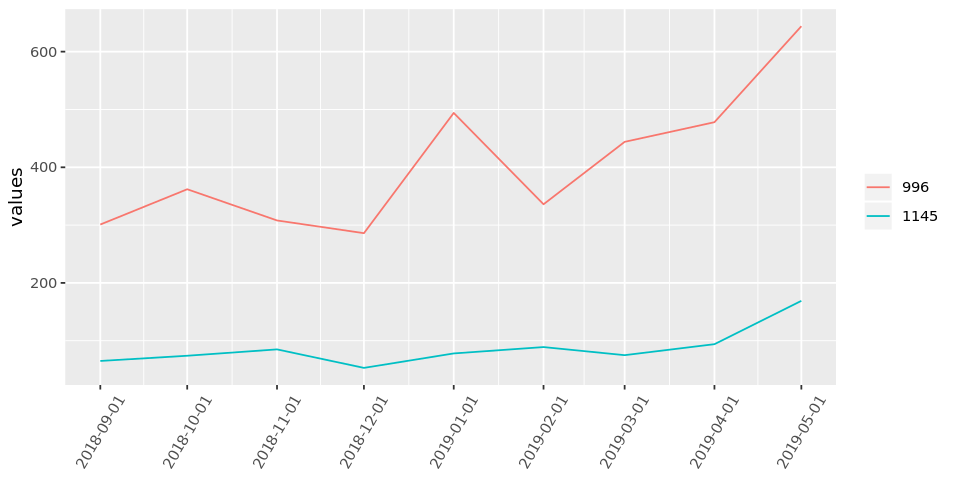

In [26]:
library("ggplot2")
options(repr.plot.width=8, repr.plot.height=4)

# plotting tweets 
ggplot(data=tweets_by, aes(x=as.Date(labels), y=values)) + 
    geom_line(aes(colour = factor(politician_id))) + 
    theme(axis.text.x = element_text( angle = 60, hjust = 0.5, vjust = 0.5),
        axis.title.x = element_blank(), legend.title = element_blank()) +
    scale_x_date(date_breaks = "1 month") 

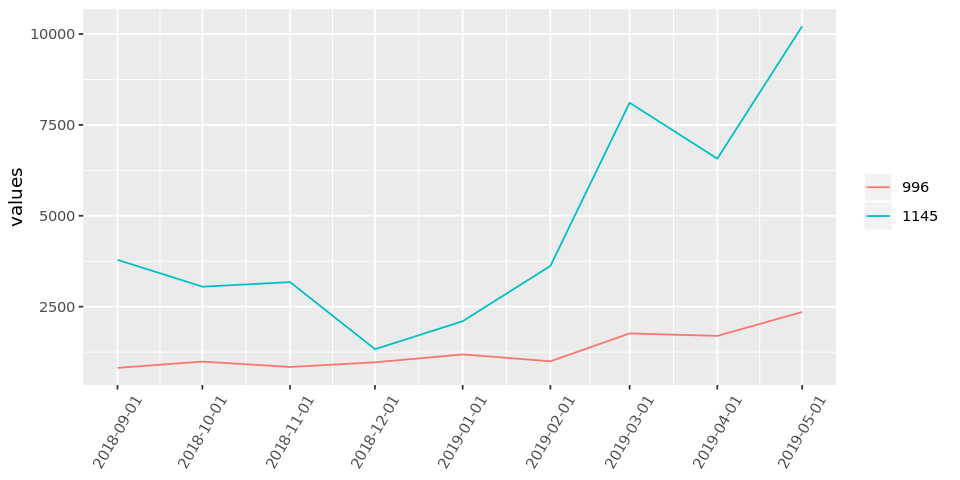

In [51]:
# plotting reponses 
ggplot(data=replies_to, aes(x=as.Date(labels), y=values)) + 
    geom_line(aes(colour = factor(politician_id))) + 
    theme(axis.text.x = element_text( angle = 60, hjust = 0.5, vjust = 0.5),
        axis.title.x = element_blank(), legend.title = element_blank()) +
    scale_x_date(date_breaks = "1 month") 

In [74]:
all <- merge(tweets_by, replies_to, by=c('labels', 'politician_id'))
all

labels,politician_id,response_type.x,aggregated_by.x,values.x,response_type.y,aggregated_by.y,values.y
<fct>,<dbl>,<fct>,<fct>,<int>,<fct>,<fct>,<int>
2018-09-01,1145,aggregation,month,65,aggregation,month,3789
2018-09-01,996,aggregation,month,301,aggregation,month,816
2018-10-01,1145,aggregation,month,74,aggregation,month,3050
2018-10-01,996,aggregation,month,362,aggregation,month,989
2018-11-01,1145,aggregation,month,85,aggregation,month,3176
2018-11-01,996,aggregation,month,308,aggregation,month,841
2018-12-01,1145,aggregation,month,53,aggregation,month,1330
2018-12-01,996,aggregation,month,286,aggregation,month,969
2019-01-01,1145,aggregation,month,78,aggregation,month,2100


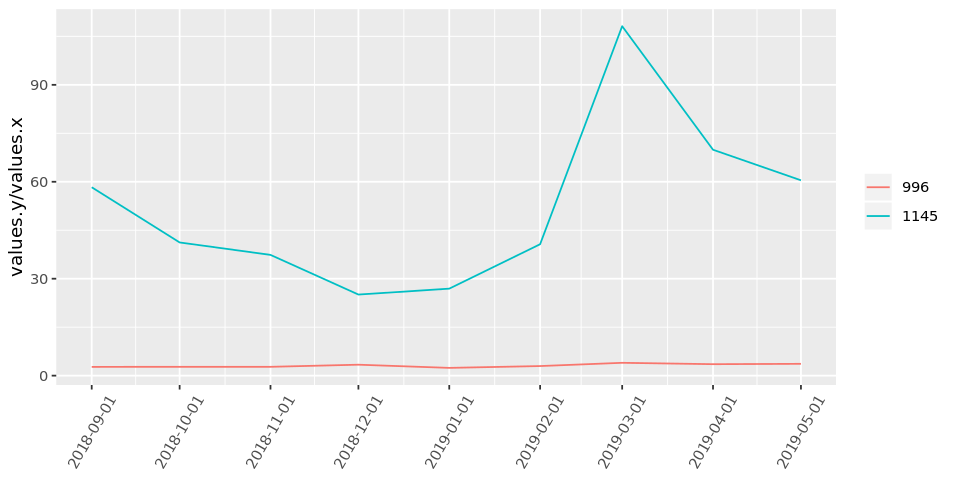

In [77]:
# plotting ratio between responses and tweets 
all <- merge(tweets_by, replies_to, by=c('labels', 'politician_id'))
ggplot(data=all, aes(x=as.Date(labels), y=values.y/values.x)) + 
    geom_line(aes(colour = factor(politician_id))) + 
    theme(axis.text.x = element_text( angle = 60, hjust = 0.5, vjust = 0.5),
        axis.title.x = element_blank(), legend.title = element_blank()) +
    scale_x_date(date_breaks = "1 month") 

# Und nun nur mit Tweets über Thema X